In [2]:
# Import necessary modules and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Import the dataset
db = pd.read_csv('Mall_Customers.csv')

# Check it was imported properly
db.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis - Univariate, Bivariate Analysis
- Univariate Analysis: Analyze with 1 variable
- Bivariate Analysis: Analyze with 1 variable

#### Univariate Analysis: Reveals the dataset shape

In [4]:
# Univariate Analysis Part 1: Summary ...
db.describe()

# Note: Mean and Mod are similar meaning Normal Distribution

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


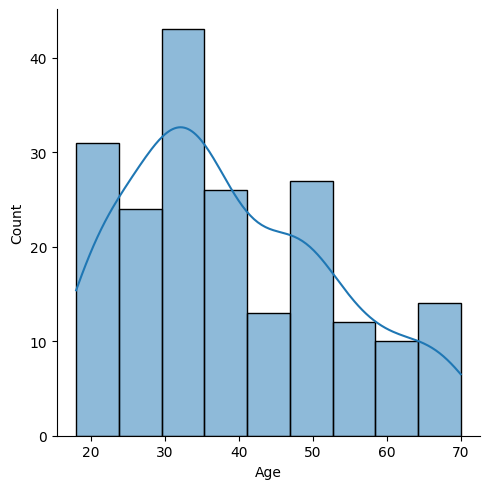

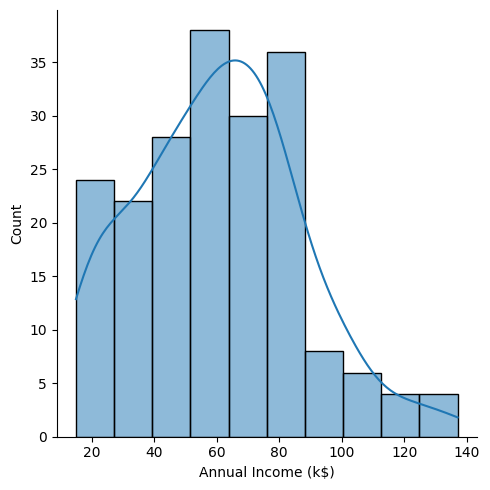

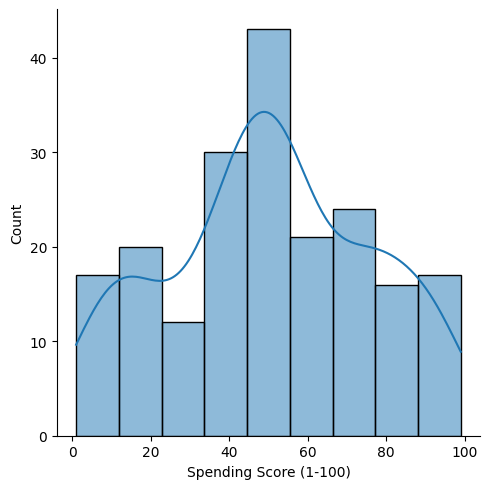

In [5]:
# Univariaate Analysis Part 2: For loop Hisogram

# See what columns are available for analysis
db.columns

# Utilize for loops for efficiency
Variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in Variables:
    sns.displot(data=db, x=i, kde=True)

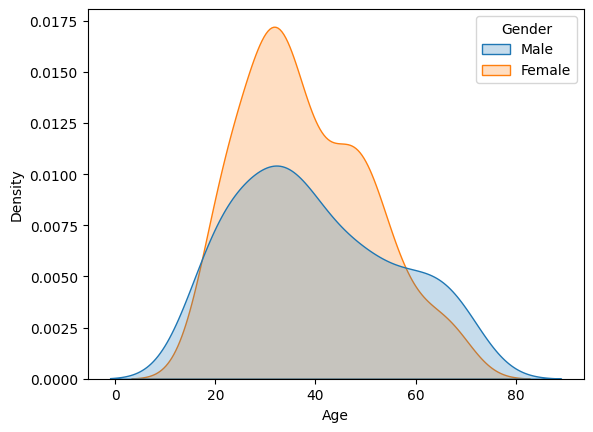

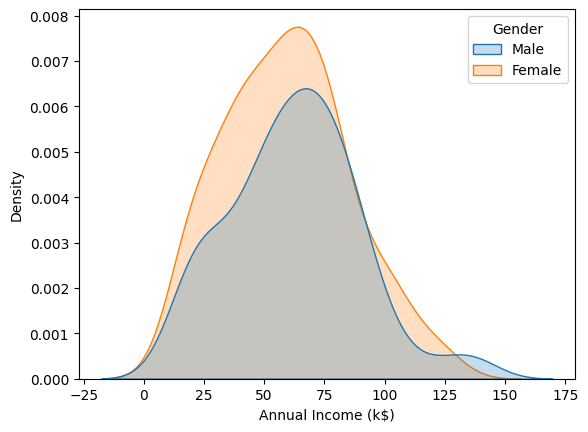

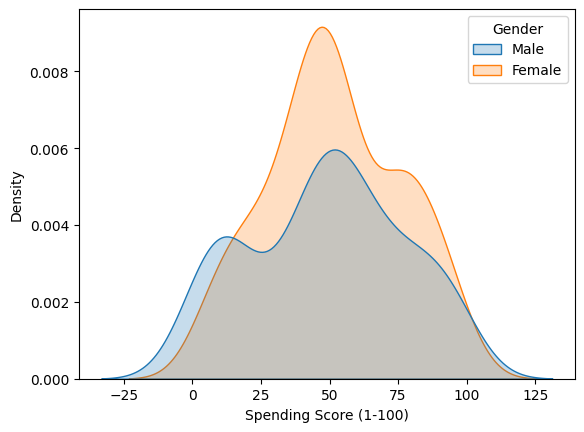

In [6]:
# Univariate Analysis Part 3: KDE Plot

# Call the Variables values established previously
for i in Variables:
    plt.figure()
    sns.kdeplot(data=db, x=i, hue=db['Gender'], fill=True)

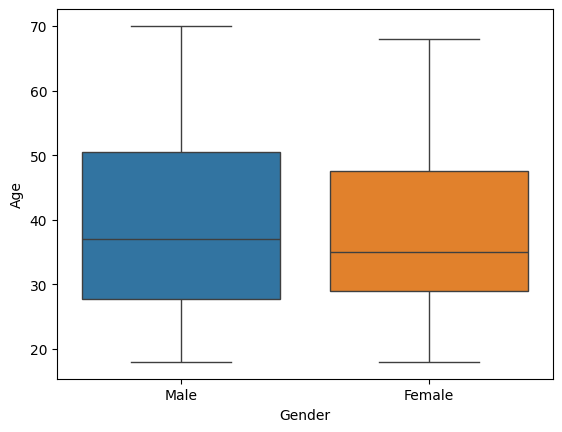

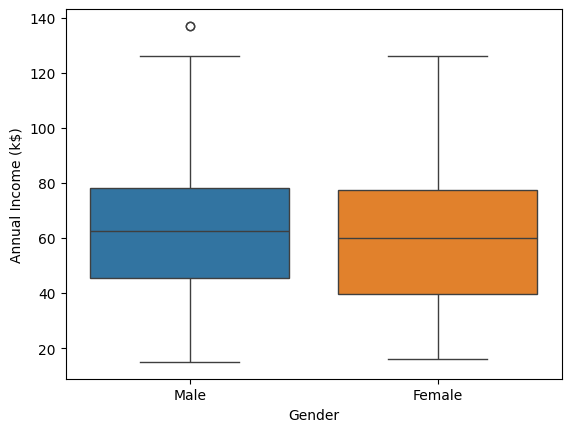

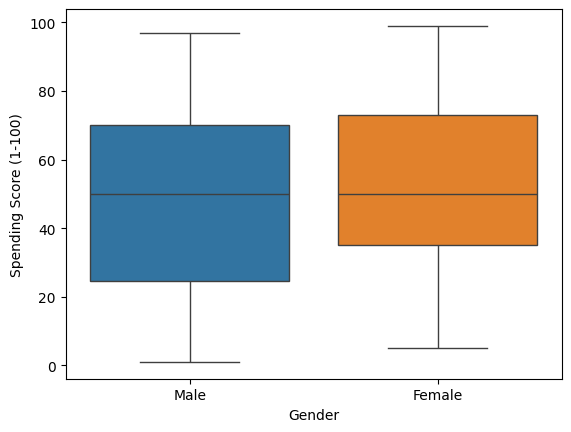

In [7]:
# Univariate Analysis Part 4: Boxplot
# Easily distinguish the outliar

for i in Variables:
    plt.figure()
    sns.boxplot(data=db, x='Gender', y=i, hue=db['Gender'])

In [8]:
# From the Univariate Analysis 3 & 4, there seems to be more female than male participants
# Check to see Female > Male?
db['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
# Percentage version
db['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#### Bivariate Analysis: Analyze with two variables

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

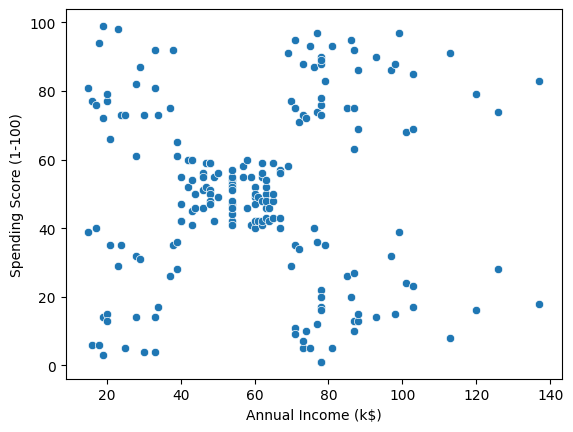

In [10]:
# Bivariate Analysis Part 1: Bivariate Clusters via Scatterplot
sns.scatterplot(data=db, x=db['Annual Income (k$)'], y=db['Spending Score (1-100)'])

# Note: Identified 5 different bivariate clusters based on the Annual Income and Spending Score

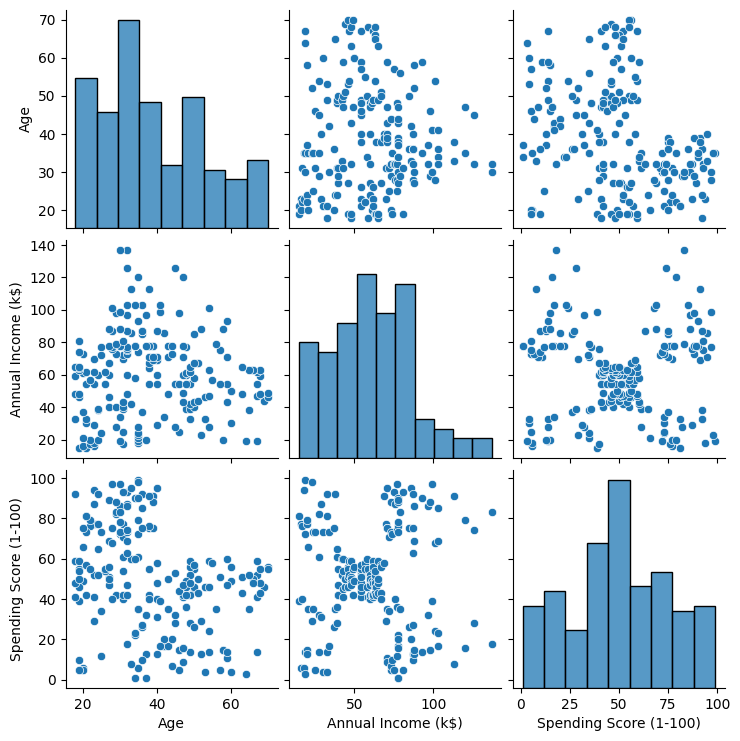

In [11]:
# Bivariate Analysis Part 2: Pairplot --> For quick insights
# Pairplot cross-references the variables and creates histograms and scatterplot

db = pd.read_csv('Mall_Customers.csv') # Reinterated so don't have to run whole code again to reset database to include 'CustomerID'
db=db.drop('CustomerID', axis=1) # Remove the column variable 'CustomerID' (Column: axis=1  |  Row: axis=0) as it can't provide any insights
sns.pairplot(db)

# NOTE: Only noticable bivariate cluster are between Annual Salary & Spending Scare 

In [12]:
# Check the mean for each variables based on Gender
db.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
# Bivariate Analysis Part 3: Correlation
# From the scatterplot we know there is a correlation between Annual Income and Spending Score
# With corr(), we can check correlation strength

numeric_db = db.select_dtypes(include='number')
numeric_db.corr()

# NOTE: corr() only works on numeric columns
# db contains non-numeric columns like Gender (strings: 'Male', 'Female')
# Therefore need to select only numerical column to compute correlation

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

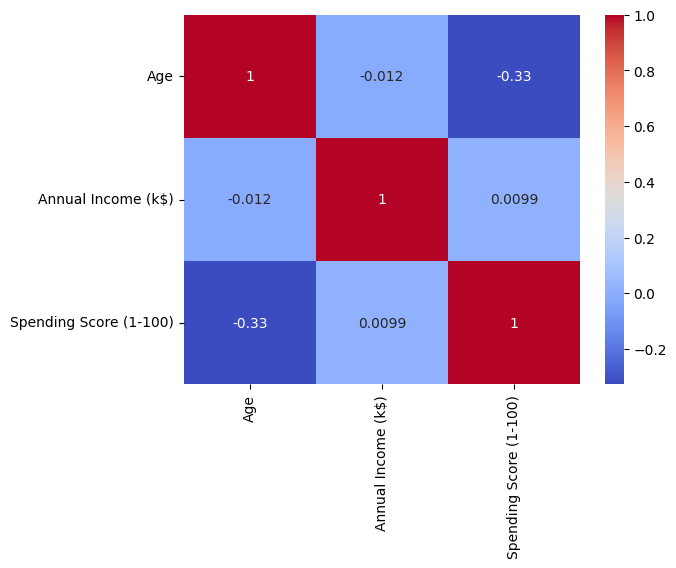

In [14]:
# Bivariate Analysis Part 4: Correlation Heat Map
sns.heatmap(numeric_db.corr(), annot=True, cmap='coolwarm')


## Clustering Analysis - Univariate, Bivariate, Multivariate Cluster
- Utilizes KMean algorithm

#### Univariate Cluster Analysis

In [15]:
# Utilize KMean Algorithm through 'Cluster8' to cluster the annual income
Cluster8 = KMeans()
Cluster8.fit(db[['Annual Income (k$)']])
Cluster8.labels_ # Print cluster group labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [16]:
# Append Cluster8 labels to database
db['Income Cluster8'] = Cluster8.labels_
db.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster8
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [17]:
# Count values in each cluster
db['Income Cluster8'].value_counts()

Income Cluster8
7    42
2    36
1    32
6    30
4    24
0    16
5    14
3     6
Name: count, dtype: int64

1 Cluster:  137277.28000000003
2 Cluster:  49761.73701298701
3 Cluster:  23517.330930930933
4 Cluster:  14647.235170393065
5 Cluster:  8667.679614837509
6 Cluster:  5740.70709382151
7 Cluster:  4109.45147123408
8 Cluster:  2857.441697191697
9 Cluster:  2412.833028083028
10 Cluster:  1767.6406204906204


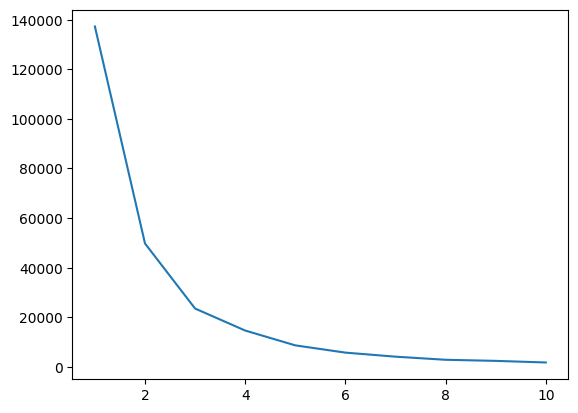

In [18]:
# How to identify best number of cluster parameter for KMeans() (Default is 8 clusters)?
    # Low intertia and low number of clusters
    # Intertia: The sum of squared distances of each value is from the centre of is cluster

# Optimal cluster is 3
intertia_scores = []
for a in range(1,11):
    kmeans = KMeans(a)
    kmeans.fit(db[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
    print(a, 'Cluster: ', kmeans.inertia_)
plt.plot(range(1,11), intertia_scores) # If no range(1, 11) then x-axis won't show the final cluster

# NOTE: Optimal cluster is 3 based on the Elbow Method
# 3 because when we look on the plt.plot graph we see that with 3 clusters there is an elbow bend


In [19]:
# Update KMean parameters to 3 clusters as identified from plt.plot()
Cluster3 = KMeans(n_clusters=3)
Cluster3.fit(db[['Annual Income (k$)']])
db['Income Cluster3'] = Cluster3.labels_ # Relative to Annual Income, append Cluster3 Labels to database

print(db['Income Cluster3'].value_counts())
print(Cluster3.labels_)
db.head()

Income Cluster3
1    86
2    58
0    56
Name: count, dtype: int64
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster8,Income Cluster3
0,Male,19,15,39,4,2
1,Male,21,15,81,4,2
2,Female,20,16,6,4,2
3,Female,23,16,77,4,2
4,Female,31,17,40,4,2


In [20]:
# Variable details for each cluster
db.groupby('Income Cluster3')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# NOTE: The table confirms the inverse correlation from Age for Annual Income and Spending Score

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster3,,,
0,36.910714,92.142857,50.517857
1,41.279070,60.906977,50.337209
2,37.120690,29.551724,49.689655


#### Bivariate Cluster Analysis

In [21]:
# Utilize KMeans algorithm to cluster bivariates 
Bicluster = KMeans()
Bicluster.fit(db[['Annual Income (k$)', 'Spending Score (1-100)']]) # Uses 2 variables
print(Bicluster.labels_)

# Append the Bivariate cluster to the database
db['Spending & Income Cluster'] = Bicluster.labels_
db.head()

[7 2 4 2 7 2 4 2 4 2 4 2 4 2 4 2 7 2 7 2 7 2 4 2 4 2 7 2 7 2 4 2 4 2 4 2 4
 2 7 2 7 2 7 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 6 1 1 6 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 0 5 0 6 0 5 0 5 0 6 0 5 0 5 0 5 0 5 0 6 0 5 0 6 0
 5 0 5 0 5 0 5 0 5 0 5 0 6 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster8,Income Cluster3,Spending & Income Cluster
0,Male,19,15,39,4,2,7
1,Male,21,15,81,4,2,2
2,Female,20,16,6,4,2,4
3,Female,23,16,77,4,2,2
4,Female,31,17,40,4,2,7


1 Cluster:  269981.28
2 Cluster:  184102.15349264705
3 Cluster:  106348.37306211119
4 Cluster:  73679.78903948834
5 Cluster:  44448.45544793371
6 Cluster:  37442.24745037571
7 Cluster:  35079.50456270782
8 Cluster:  28074.177120705383
9 Cluster:  21932.39204424098
10 Cluster:  20781.526776475555


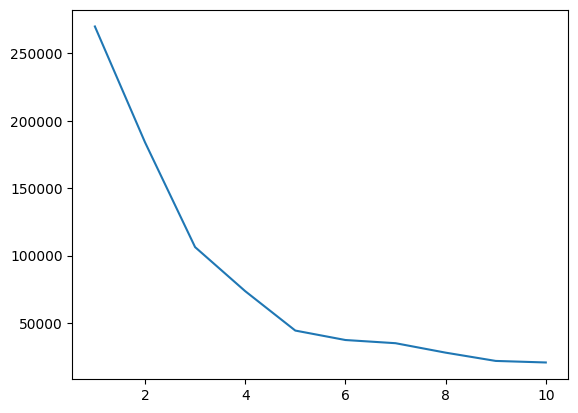

In [22]:
# Identified optimal cluster number is 5
Bintertia_scores = []
for b in range(1,11):
    Bikmeans = KMeans(b)
    Bikmeans.fit(db[['Annual Income (k$)', 'Spending Score (1-100)']])
    Bintertia_scores.append(Bikmeans.inertia_)
    print(b, 'Cluster: ', Bikmeans.inertia_)
plt.plot(range(1,11), Bintertia_scores) # 5 cluster is optimal, according to the elbow method

In [23]:
# Update Bicluster KMean algorithm with optimal cluster number, 5
Bicluster = KMeans(n_clusters=5)
Bicluster.fit(db[['Annual Income (k$)', 'Spending Score (1-100)']]) # Uses 2 variables
print(Bicluster.labels_)

# Append the new Bivariate cluster labels to the database
db['Spending & Income Cluster'] = Bicluster.labels_
db.head()

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster8,Income Cluster3,Spending & Income Cluster
0,Male,19,15,39,4,2,4
1,Male,21,15,81,4,2,0
2,Female,20,16,6,4,2,4
3,Female,23,16,77,4,2,0
4,Female,31,17,40,4,2,4


In [24]:
# Identify the cluster centroid
Bicluster_Center = pd.DataFrame(Bicluster.cluster_centers_)
Bicluster_Center.columns=('x', 'y')
Bicluster_Center

,x,y
0,25.727273,79.363636
1,88.200000,17.114286
2,86.538462,82.128205
3,55.296296,49.518519
4,26.304348,20.913043


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

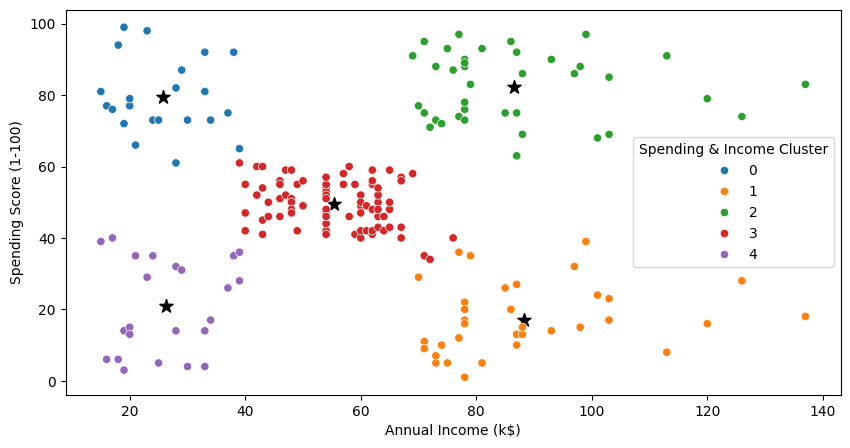

In [25]:
# Easily visualize the bivariate cluster with scatterplot
plt.figure(figsize=(10,5)) # Change chart size
plt.scatter(x=Bicluster_Center['x'], y=Bicluster_Center['y'], marker="*", c='black', s=100 ) # Plot each cluster's centroid
sns.scatterplot(data=db, x=db['Annual Income (k$)'], y=db['Spending Score (1-100)'], hue=db['Spending & Income Cluster'], palette='tab10') 

In [26]:
# Variable details for each bicluster
db.groupby('Spending & Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending & Income Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


In [27]:
# Gender split for each bicluster
pd.crosstab(db['Spending & Income Cluster'], db['Gender'])

Gender,Female,Male
Spending & Income Cluster,,
0,13,9
1,16,19
2,21,18
3,48,33
4,14,9


#### Multivariate Cluster Analysis

In [28]:
# Import the required module to scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [29]:
# Generate Gender Dummies variables to convert string to int
multi_db = pd.get_dummies(db, dtype=int)
multi_db.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster8,Income Cluster3,Spending & Income Cluster,Gender_Female,Gender_Male
0,19,15,39,4,2,4,0,1
1,21,15,81,4,2,0,0,1
2,20,16,6,4,2,4,1,0
3,23,16,77,4,2,0,1,0
4,31,17,40,4,2,4,1,0


In [30]:
# Create new dataframe with certain columns for multivariate analysis
multi_db = multi_db[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
multi_db.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [31]:
# Transform the dataframe through scaling so that values are on the same level
multi_db = pd.DataFrame(scale.fit_transform(multi_db))
multi_db.columns=('Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male')
multi_db.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


1 Multivariant Clusters 800.0
2 Multivariant Clusters 588.8026767824937
3 Multivariant Clusters 494.8294892843071
4 Multivariant Clusters 388.6517944744494
5 Multivariant Clusters 331.3033936990613
6 Multivariant Clusters 297.61687188334923
7 Multivariant Clusters 261.4375568800356
8 Multivariant Clusters 220.7949275993538
9 Multivariant Clusters 222.18658900270336
10 Multivariant Clusters 152.11801327614117


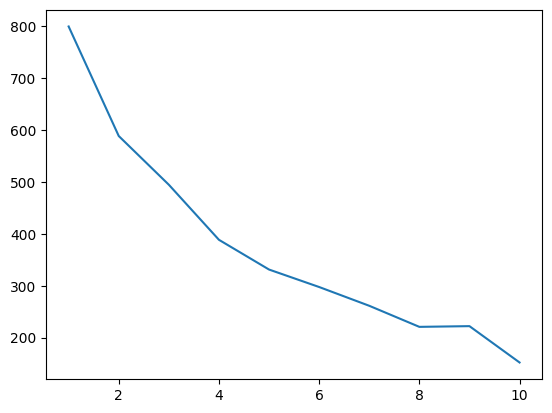

In [32]:
# Ideal cluster number is, 4
Mintertia_scores = []
for m in range(1,11):
    MKMeans = KMeans(m)
    MKMeans.fit(multi_db)
    Mintertia_scores.append(MKMeans.inertia_)
    print(m, 'Multivariant Clusters', MKMeans.inertia_)
plt.plot(range(1, 11), Mintertia_scores)

In [33]:
# Utilize optimal number of clusters to cluster the multivariate variables
Mcluster = KMeans(n_clusters = 4)
Mcluster.fit(multi_db)
print(Mcluster.labels_)

multi_db['Mcluster'] = Mcluster.labels_ # Respectively join the MCluster labels to multivariate dataframe
db['Mcluster'] = Mcluster.labels_ # Join cluster labels to original dataframe with all the different clusters.
db

[0 0 1 2 2 2 1 2 3 2 3 2 1 2 3 0 1 0 3 2 3 0 1 0 1 0 1 0 1 2 3 2 3 0 1 2 1
 2 1 2 1 0 3 2 1 2 1 2 2 2 1 0 2 3 1 3 1 3 2 3 3 0 1 1 3 0 1 1 0 2 3 1 1 1
 3 0 1 3 2 1 3 0 3 1 2 3 1 2 2 1 1 0 3 1 2 0 1 2 3 0 2 1 3 0 3 2 1 3 3 3 3
 2 1 0 2 2 1 1 1 1 0 1 2 0 2 2 3 0 3 0 3 0 2 2 0 2 1 0 0 2 1 0 2 2 0 0 3 2
 1 0 3 0 1 2 1 2 3 2 3 2 1 2 0 2 3 2 3 2 1 0 3 0 3 0 1 2 3 0 3 0 1 2 3 2 1
 0 1 0 1 2 1 2 3 2 1 2 1 0 0 0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster8,Income Cluster3,Spending & Income Cluster,Mcluster
0,Male,19,15,39,4,2,4,0
1,Male,21,15,81,4,2,0,0
2,Female,20,16,6,4,2,4,1
3,Female,23,16,77,4,2,0,2
4,Female,31,17,40,4,2,4,2
...,...,...,...,...,...,...,...,...
195,Female,35,120,79,3,0,2,2
196,Female,45,126,28,3,0,1,1
197,Male,32,126,74,3,0,2,0
198,Male,32,137,18,3,0,1,0


In [ ]:
# Feature of each Multivariate Clusters
db.groupby('Mcluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Mcluster,,,
0,27.666667,64.933333,64.822222
1,48.109091,58.818182,34.781818
2,28.438596,59.666667,67.684211
3,52.511628,59.395349,31.441860
